Here, we use multivariate linear regression to predice the value of a house given its area and number of bedrooms. Let's begin by writing the UDF that applies feature scaling and mean normalization to the input data.

In [1]:
%%file featureNormalize.m

function [X_norm, mu, sigma] = featureNormalize(X)

feature_count = size(X, 2);

mu = mean(X);
sigma = std(X);
X_norm = (X - mu)./(sigma);

end

Created file 'C:\Varun\Programming\MachineLearning\1.Tutorials\1.Coursera_AndrewNg\Week_2\featureNormalize.m'.


Also create the functions to compute the cost function and perform gradient descent.

In [2]:
%%file computeCostMulti.m

function J = computeCostMulti(X, y, theta)
m = length(y); % number of training examples
J = (sum((X*theta - y).^2))./(2*m);
end

Created file 'C:\Varun\Programming\MachineLearning\1.Tutorials\1.Coursera_AndrewNg\Week_2\computeCostMulti.m'.


In [3]:
%%file gradientDescentMulti.m

function [theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters)

m = length(y); % number of training examples
J_history = zeros(num_iters, 1);
parameter_count = size(theta,1);
temp_theta = theta;

for iter = 1:num_iters
    for j=1:parameter_count
        temp_theta(j) = theta(j) - (alpha.*(sum((X*theta - y).*X(:,j))))./(m);
    end

    %update theta with the newly calculated theta
    theta = temp_theta;
    
    % Save the cost J in every iteration    
    J_history(iter) = computeCostMulti(X, y, theta);

end
end

Created file 'C:\Varun\Programming\MachineLearning\1.Tutorials\1.Coursera_AndrewNg\Week_2\gradientDescentMulti.m'.


Load the input data and compute the model. Also plot the evolution of the cost function with each iteration. 

In [4]:
data = load('machine-learning-ex1\ex1\ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

fprintf('Normalizing Features ...\n');

[X mu sigma] = featureNormalize(X);
% Add intercept term to X
X = [ones(m, 1) X];

fprintf('Running gradient descent ...\n');

% Choose some alpha value
alpha = 0.01;
num_iters = 1000;

% Init Theta and Run Gradient Descent 
theta = zeros(3, 1);
[theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters);

% Display gradient descent's result
fprintf('Theta computed from gradient descent: \n');
fprintf(' %f \n', theta);
fprintf('\n');

Normalizing Features ...
Running gradient descent ...
Theta computed from gradient descent: 
 340397.963535 
 109848.008460 
 -5866.454085 




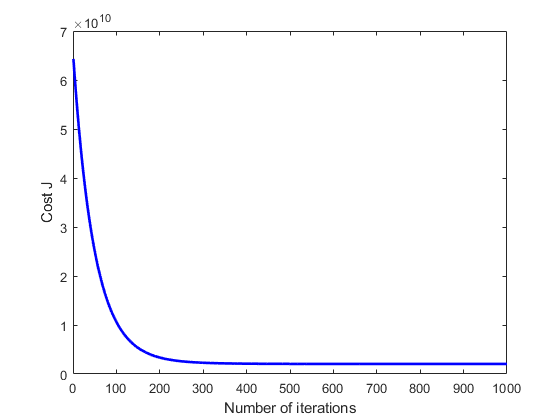

In [5]:
% Plot the convergence graph
figure;
plot(1:numel(J_history), J_history, '-b', 'LineWidth', 2);
xlabel('Number of iterations');
ylabel('Cost J');

Use the model to compute the price of a 1650 sq. ft. house with 3 bed rooms.

In [6]:
ip_area = 1650;
ip_room_count = 3;

ip_area_norm = (ip_area - mu(1))./sigma(1);
ip_room_count_norm = (ip_room_count - mu(2))./sigma(2);

ip_parameters = [1 ip_area_norm ip_room_count_norm];

price = ip_parameters*theta;

% ============================================================

fprintf(['Predicted price of a 1650 sq-ft, 3 br house ' ...
         '(using gradient descent):\n $%f\n'], price);

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $293237.161479



Let's now use the normal equation to minimize the cost function instead of the iterative gradient descent algorithm.

In [7]:
%%file normalEqn.m

function [theta] = normalEqn(X, y)

theta = pinv(transpose(X)*X)*transpose(X)*y;

Created file 'C:\Varun\Programming\MachineLearning\1.Tutorials\1.Coursera_AndrewNg\Week_2\normalEqn.m'.


In [10]:
data = load('machine-learning-ex1\ex1\ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

X = [ones(m, 1) X];

theta = normalEqn(X, y);

ip_area = 1650;
ip_room_count = 3;

ip_parameters = [1 ip_area ip_room_count];

price = ip_parameters*theta;

fprintf(['Predicted price of a 1650 sq-ft, 3 br house ' ...
         '(using normal equations):\n $%f\n'], price);

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 $293081.464335



The predicted price using the gradient descent method and the normal equation are roughly the same, as they should be.